In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    plt.ylim(-1, 50)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_robot = 48
experiment_time = 1800
num_run = 100

In [6]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/standalone_circular'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/timeout_respawn_study_red'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/timeout_respawn_study_blue'

In [7]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/timeout_respawn_study_red exists


In [8]:
elpsTimeout_label = ['time', 'kID', 'areaID', 'areaColor']

In [9]:
elapsed_timeout_dict = {}

timeout = -1
respawn = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
        elif param.startswith("respawn"):
#           print(param.split("#")[-1])
            respawn = int(param.split("#")[-1])
            print("\trespawn:",respawn)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
    if respawn == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    elapsed_timeout_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("elapsed_timeoutLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                continue
            print('\tfilename: ', filename)
            
            df_elpsTimeot = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_elpsTimeot.columns = elpsTimeout_label
#             print(df_elpsTimeot['kID'].values)
            counter = Counter(df_elpsTimeot['kID'].values)
            
            for i in np.arange(num_robot):
                if i not in counter.keys():
                    print("\t",i)
                    counter[i] = 0
            elapsed_timeout_count += list(counter.values())
#             print(elapsed_timeout_count)
    
    if len(elapsed_timeout_count):
        elapsed_timeout_dict[str(timeout)+","+str(respawn)] = elapsed_timeout_count
    else:
        print(colored("\tWARNING: empty list!!", 'green'))
        elapsed_timeout_dict[str(timeout)+","+str(respawn)] = [0] * num_robot * num_run
            


Timeout folder: TimeoutRespawnExp_2021-06-26_robots#48_timeout#1_respawn#10_redAreas#16_1800#seconds
	timeout: 10
	respawn: 10
	filename:  seed#28_elapsed_timeoutLOG.tsv
	filename:  seed#35_elapsed_timeoutLOG.tsv
	filename:  seed#90_elapsed_timeoutLOG.tsv
	filename:  seed#66_elapsed_timeoutLOG.tsv
	filename:  seed#76_elapsed_timeoutLOG.tsv
	filename:  seed#20_elapsed_timeoutLOG.tsv
	filename:  seed#46_elapsed_timeoutLOG.tsv
	filename:  seed#67_elapsed_timeoutLOG.tsv
	filename:  seed#84_elapsed_timeoutLOG.tsv
	filename:  seed#5_elapsed_timeoutLOG.tsv
	filename:  seed#61_elapsed_timeoutLOG.tsv
	filename:  seed#38_elapsed_timeoutLOG.tsv
	filename:  seed#81_elapsed_timeoutLOG.tsv
	filename:  seed#42_elapsed_timeoutLOG.tsv
	filename:  seed#70_elapsed_timeoutLOG.tsv
	filename:  seed#31_elapsed_timeoutLOG.tsv
	filename:  seed#91_elapsed_timeoutLOG.tsv
	filename:  seed#3_elapsed_timeoutLOG.tsv
	filename:  seed#83_elapsed_timeoutLOG.tsv
	filename:  seed#55_elapsed_timeoutLOG.tsv
	filename:  see

	filename:  seed#58_elapsed_timeoutLOG.tsv
	filename:  seed#27_elapsed_timeoutLOG.tsv
	filename:  seed#95_elapsed_timeoutLOG.tsv
	filename:  seed#99_elapsed_timeoutLOG.tsv
	filename:  seed#11_elapsed_timeoutLOG.tsv
	filename:  seed#22_elapsed_timeoutLOG.tsv
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#14_elapsed_timeoutLOG.tsv
	filename:  seed#34_elapsed_timeoutLOG.tsv
	filename:  seed#53_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	filename:  seed#68_elapsed_timeoutLOG.tsv
	filename:  seed#36_elapsed_timeoutLOG.tsv
	filename:  seed#74_elapsed_timeoutLOG.tsv
	filename:  seed#64_elapsed_timeoutLOG.tsv
	filename:  seed#26_elapsed_timeoutLOG.tsv
	filename:  seed#72_elapsed_timeoutLOG.tsv
	filename:  seed#2_elapsed_timeoutLOG.tsv
	filename:  seed#71_elapsed_timeoutLOG.tsv
	filename:  seed#86_elapsed_timeoutLOG.tsv
	filename:  seed#82_elapsed_timeoutLOG.tsv
	filename:  seed#8_elapsed_timeoutLOG.tsv
	filename:  seed#15_elapsed_timeoutLOG.tsv
	filename:  se

	filename:  seed#30_elapsed_timeoutLOG.tsv
	filename:  seed#37_elapsed_timeoutLOG.tsv
	filename:  seed#10_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#24_elapsed_timeoutLOG.tsv
	filename:  seed#7_elapsed_timeoutLOG.tsv
	filename:  seed#39_elapsed_timeoutLOG.tsv
	filename:  seed#69_elapsed_timeoutLOG.tsv
	filename:  seed#58_elapsed_timeoutLOG.tsv
	filename:  seed#27_elapsed_timeoutLOG.tsv
	filename:  seed#95_elapsed_timeoutLOG.tsv
	filename:  seed#99_elapsed_timeoutLOG.tsv
	filename:  seed#11_elapsed_timeoutLOG.tsv
	filename:  seed#22_elapsed_timeoutLOG.tsv
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#14_elapsed_timeoutLOG.tsv
	filename:  seed#34_elapsed_timeoutLOG.tsv
	filename:  seed#53_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	filename:  seed#68_elapsed_timeoutLOG.tsv
	filename:  seed#36_elapsed_timeoutLOG.tsv
	filename:  seed#74_elapsed_timeoutLOG.tsv
	filename:  seed#64_elapsed_timeoutLOG.tsv
	filename:  s

	filename:  seed#87_elapsed_timeoutLOG.tsv
	filename:  seed#94_elapsed_timeoutLOG.tsv
	filename:  seed#17_elapsed_timeoutLOG.tsv
	filename:  seed#30_elapsed_timeoutLOG.tsv
	filename:  seed#37_elapsed_timeoutLOG.tsv
	filename:  seed#10_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#24_elapsed_timeoutLOG.tsv
	filename:  seed#7_elapsed_timeoutLOG.tsv
	filename:  seed#39_elapsed_timeoutLOG.tsv
	filename:  seed#69_elapsed_timeoutLOG.tsv
	filename:  seed#58_elapsed_timeoutLOG.tsv
	filename:  seed#27_elapsed_timeoutLOG.tsv
	filename:  seed#95_elapsed_timeoutLOG.tsv
	filename:  seed#99_elapsed_timeoutLOG.tsv
	filename:  seed#11_elapsed_timeoutLOG.tsv
	filename:  seed#22_elapsed_timeoutLOG.tsv
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#14_elapsed_timeoutLOG.tsv
	filename:  seed#34_elapsed_timeoutLOG.tsv
	filename:  seed#53_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	filename:  seed#68_elapsed_timeoutLOG.tsv
	filename:  s

	filename:  seed#37_elapsed_timeoutLOG.tsv
	filename:  seed#10_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#24_elapsed_timeoutLOG.tsv
	filename:  seed#7_elapsed_timeoutLOG.tsv
	filename:  seed#39_elapsed_timeoutLOG.tsv
	filename:  seed#69_elapsed_timeoutLOG.tsv
	filename:  seed#58_elapsed_timeoutLOG.tsv
	filename:  seed#27_elapsed_timeoutLOG.tsv
	filename:  seed#95_elapsed_timeoutLOG.tsv
	filename:  seed#99_elapsed_timeoutLOG.tsv
	filename:  seed#11_elapsed_timeoutLOG.tsv
	filename:  seed#22_elapsed_timeoutLOG.tsv
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#14_elapsed_timeoutLOG.tsv
	filename:  seed#34_elapsed_timeoutLOG.tsv
	filename:  seed#53_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	filename:  seed#68_elapsed_timeoutLOG.tsv
	filename:  seed#36_elapsed_timeoutLOG.tsv
	filename:  seed#74_elapsed_timeoutLOG.tsv
	filename:  seed#64_elapsed_timeoutLOG.tsv
	filename:  seed#26_elapsed_timeoutLOG.tsv
	filename:  s

	filename:  seed#16_elapsed_timeoutLOG.tsv
	filename:  seed#12_elapsed_timeoutLOG.tsv
	filename:  seed#32_elapsed_timeoutLOG.tsv
	filename:  seed#21_elapsed_timeoutLOG.tsv
	filename:  seed#41_elapsed_timeoutLOG.tsv
	filename:  seed#29_elapsed_timeoutLOG.tsv
	filename:  seed#50_elapsed_timeoutLOG.tsv
	filename:  seed#48_elapsed_timeoutLOG.tsv
	filename:  seed#54_elapsed_timeoutLOG.tsv
	filename:  seed#62_elapsed_timeoutLOG.tsv
	filename:  seed#87_elapsed_timeoutLOG.tsv
	filename:  seed#94_elapsed_timeoutLOG.tsv
	filename:  seed#17_elapsed_timeoutLOG.tsv
	filename:  seed#30_elapsed_timeoutLOG.tsv
	filename:  seed#37_elapsed_timeoutLOG.tsv
	filename:  seed#10_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#24_elapsed_timeoutLOG.tsv
	filename:  seed#7_elapsed_timeoutLOG.tsv
	filename:  seed#39_elapsed_timeoutLOG.tsv
	filename:  seed#69_elapsed_timeoutLOG.tsv
	filename:  seed#58_elapsed_timeoutLOG.tsv
	filename:  seed#27_elapsed_timeoutLOG.tsv
	filename:  

	filename:  seed#78_elapsed_timeoutLOG.tsv
	filename:  seed#98_elapsed_timeoutLOG.tsv
	filename:  seed#18_elapsed_timeoutLOG.tsv
	filename:  seed#23_elapsed_timeoutLOG.tsv
	filename:  seed#19_elapsed_timeoutLOG.tsv
	filename:  seed#16_elapsed_timeoutLOG.tsv
	filename:  seed#12_elapsed_timeoutLOG.tsv
	filename:  seed#32_elapsed_timeoutLOG.tsv
	filename:  seed#21_elapsed_timeoutLOG.tsv
	filename:  seed#41_elapsed_timeoutLOG.tsv
	filename:  seed#29_elapsed_timeoutLOG.tsv
	filename:  seed#50_elapsed_timeoutLOG.tsv
	filename:  seed#48_elapsed_timeoutLOG.tsv
	filename:  seed#54_elapsed_timeoutLOG.tsv
	filename:  seed#62_elapsed_timeoutLOG.tsv
	filename:  seed#87_elapsed_timeoutLOG.tsv
	filename:  seed#94_elapsed_timeoutLOG.tsv
	filename:  seed#17_elapsed_timeoutLOG.tsv
	filename:  seed#30_elapsed_timeoutLOG.tsv
	filename:  seed#37_elapsed_timeoutLOG.tsv
	filename:  seed#10_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#24_elapsed_timeoutLOG.tsv
	filename: 

	filename:  seed#54_elapsed_timeoutLOG.tsv
	filename:  seed#62_elapsed_timeoutLOG.tsv
	filename:  seed#87_elapsed_timeoutLOG.tsv
	filename:  seed#94_elapsed_timeoutLOG.tsv
	filename:  seed#17_elapsed_timeoutLOG.tsv
	filename:  seed#30_elapsed_timeoutLOG.tsv
	filename:  seed#37_elapsed_timeoutLOG.tsv
	filename:  seed#10_elapsed_timeoutLOG.tsv
	filename:  seed#85_elapsed_timeoutLOG.tsv
	filename:  seed#24_elapsed_timeoutLOG.tsv
	filename:  seed#7_elapsed_timeoutLOG.tsv
	filename:  seed#39_elapsed_timeoutLOG.tsv
	filename:  seed#69_elapsed_timeoutLOG.tsv
	filename:  seed#58_elapsed_timeoutLOG.tsv
	filename:  seed#27_elapsed_timeoutLOG.tsv
	filename:  seed#95_elapsed_timeoutLOG.tsv
	filename:  seed#99_elapsed_timeoutLOG.tsv
	filename:  seed#11_elapsed_timeoutLOG.tsv
	filename:  seed#22_elapsed_timeoutLOG.tsv
	 13
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#14_elapsed_timeoutLOG.tsv
	filename:  seed#34_elapsed_timeoutLOG.tsv
	filename:  seed#53_elapsed_timeoutLOG.tsv
	filena

	filename:  seed#69_elapsed_timeoutLOG.tsv
	 13
	filename:  seed#58_elapsed_timeoutLOG.tsv
	filename:  seed#27_elapsed_timeoutLOG.tsv
	 9
	filename:  seed#95_elapsed_timeoutLOG.tsv
	 5
	 30
	filename:  seed#99_elapsed_timeoutLOG.tsv
	 25
	filename:  seed#11_elapsed_timeoutLOG.tsv
	 27
	filename:  seed#22_elapsed_timeoutLOG.tsv
	filename:  seed#93_elapsed_timeoutLOG.tsv
	filename:  seed#14_elapsed_timeoutLOG.tsv
	 6
	 14
	 28
	filename:  seed#34_elapsed_timeoutLOG.tsv
	 11
	 25
	filename:  seed#53_elapsed_timeoutLOG.tsv
	filename:  seed#1_elapsed_timeoutLOG.tsv
	 42
	 45
	filename:  seed#68_elapsed_timeoutLOG.tsv
	filename:  seed#36_elapsed_timeoutLOG.tsv
	filename:  seed#74_elapsed_timeoutLOG.tsv
	 16
	filename:  seed#64_elapsed_timeoutLOG.tsv
	filename:  seed#26_elapsed_timeoutLOG.tsv
	 46
	filename:  seed#72_elapsed_timeoutLOG.tsv
	 4
	 27
	filename:  seed#2_elapsed_timeoutLOG.tsv
	filename:  seed#71_elapsed_timeoutLOG.tsv
	filename:  seed#86_elapsed_timeoutLOG.tsv
	 46
	filename:  s

	filename:  seed#57_elapsed_timeoutLOG.tsv
	 16
	 18
	 19
	 26
	 30
	 34
	 36
	 38
	 40
	 41
	 42
	 45
	filename:  seed#88_elapsed_timeoutLOG.tsv
	 3
	 4
	 11
	 17
	 19
	 23
	 28
	 32
	 33
	 38
	 41
	 45
	filename:  seed#47_elapsed_timeoutLOG.tsv
	 0
	 3
	 4
	 5
	 8
	 9
	 17
	 19
	 22
	 29
	 31
	 35
	 37
	 39
	 42
	 44
	filename:  seed#65_elapsed_timeoutLOG.tsv
	 0
	 2
	 4
	 10
	 12
	 20
	 21
	 31
	 38
	 42
	 45
	filename:  seed#78_elapsed_timeoutLOG.tsv
	 18
	 24
	 37
	 38
	 40
	 43
	 44
	 47
	filename:  seed#98_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 6
	 8
	 9
	 10
	 12
	 13
	 18
	 19
	 22
	 23
	 24
	 25
	 26
	 28
	 30
	 32
	 37
	 39
	 40
	 44
	 46
	 47
	filename:  seed#18_elapsed_timeoutLOG.tsv
	 0
	 1
	 12
	 19
	 21
	 22
	 23
	 27
	 32
	 35
	 37
	 40
	 41
	 44
	filename:  seed#23_elapsed_timeoutLOG.tsv
	 4
	 5
	 7
	 8
	 10
	 15
	 24
	 32
	 34
	 39
	 44
	 47
	filename:  seed#19_elapsed_timeoutLOG.tsv
	 1
	 5
	 10
	 17
	 21
	 24
	 25
	 27
	 31
	 37
	filename:  seed#16_elapsed_timeoutLOG

	 2
	 4
	 8
	 9
	 10
	 12
	 13
	 14
	 15
	 16
	 19
	 21
	 22
	 23
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 43
	 44
	 47
	filename:  seed#21_elapsed_timeoutLOG.tsv
	 0
	 1
	 5
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 17
	 19
	 20
	 22
	 24
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 36
	 37
	 42
	 44
	 45
	 47
	filename:  seed#41_elapsed_timeoutLOG.tsv
	 0
	 1
	 3
	 5
	 6
	 7
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 21
	 22
	 25
	 26
	 27
	 28
	 29
	 30
	 32
	 34
	 38
	 40
	 42
	 44
	 45
	 46
	 47
	filename:  seed#29_elapsed_timeoutLOG.tsv
	 2
	 4
	 5
	 6
	 7
	 10
	 11
	 12
	 14
	 16
	 17
	 18
	 21
	 22
	 24
	 25
	 26
	 28
	 31
	 33
	 34
	 36
	 37
	 38
	 44
	 45
	 47
	filename:  seed#50_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 6
	 7
	 8
	 9
	 10
	 11
	 13
	 15
	 16
	 17
	 18
	 19
	 21
	 22
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#48_elapsed_timeoutLOG.tsv
	 0
	 6
	 7
	 14
	 15
	 17
	 19
	 21
	 22


	 6
	 8
	 11
	 14
	 15
	 17
	 20
	 23
	 24
	 26
	 32
	 33
	 42
	filename:  seed#99_elapsed_timeoutLOG.tsv
	 0
	 13
	 19
	 34
	filename:  seed#11_elapsed_timeoutLOG.tsv
	 7
	 11
	 19
	 26
	 30
	 31
	 41
	filename:  seed#22_elapsed_timeoutLOG.tsv
	 2
	 13
	 29
	filename:  seed#93_elapsed_timeoutLOG.tsv
	 6
	 18
	 25
	 28
	 35
	 37
	filename:  seed#14_elapsed_timeoutLOG.tsv
	 11
	 13
	 14
	 15
	 20
	 24
	 25
	 26
	 28
	 31
	 34
	 35
	 43
	 47
	filename:  seed#34_elapsed_timeoutLOG.tsv
	 1
	 15
	 28
	 29
	 32
	 38
	 39
	 42
	filename:  seed#53_elapsed_timeoutLOG.tsv
	 2
	 4
	 15
	 20
	 21
	 22
	 23
	 24
	 26
	 36
	 39
	 40
	 42
	 44
	filename:  seed#1_elapsed_timeoutLOG.tsv
	 23
	 24
	 34
	filename:  seed#68_elapsed_timeoutLOG.tsv
	 0
	 8
	 9
	 10
	 14
	 16
	 17
	 22
	 36
	 37
	 46
	filename:  seed#36_elapsed_timeoutLOG.tsv
	 1
	 21
	 33
	 37
	filename:  seed#74_elapsed_timeoutLOG.tsv
	 28
	filename:  seed#64_elapsed_timeoutLOG.tsv
	 6
	 16
	 17
	 26
	 31
	 33
	 34
	 40
	 47
	filename:  se

	 2
	 3
	 5
	 6
	 11
	 12
	 14
	 16
	 17
	 18
	 19
	 22
	 28
	 31
	 32
	 33
	 39
	 43
	 44
	 45
	 46
	filename:  seed#69_elapsed_timeoutLOG.tsv
	 3
	 4
	 5
	 7
	 10
	 16
	 22
	 26
	 27
	 29
	 33
	 34
	 40
	 43
	 46
	 47
	filename:  seed#58_elapsed_timeoutLOG.tsv
	 0
	 4
	 7
	 12
	 13
	 19
	 21
	 22
	 23
	 24
	 26
	 27
	 29
	 32
	 36
	 37
	 38
	 39
	 47
	filename:  seed#27_elapsed_timeoutLOG.tsv
	 7
	 9
	 13
	 16
	 18
	 22
	 23
	 24
	 27
	 28
	 30
	 33
	 35
	 36
	 40
	 41
	 42
	 44
	 45
	 46
	filename:  seed#95_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 5
	 6
	 11
	 12
	 14
	 15
	 16
	 17
	 19
	 20
	 23
	 24
	 25
	 27
	 28
	 29
	 30
	 31
	 33
	 35
	 37
	 38
	 40
	 42
	 43
	 44
	 45
	filename:  seed#99_elapsed_timeoutLOG.tsv
	 5
	 6
	 8
	 10
	 12
	 13
	 16
	 33
	 34
	 36
	 37
	 44
	 45
	 46
	filename:  seed#11_elapsed_timeoutLOG.tsv
	 1
	 2
	 5
	 6
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 19
	 21
	 24
	 27
	 28
	 29
	 30
	 31
	 33
	 34
	 35
	 37
	 41
	 42
	 43
	 44
	 45
	 46
	filename:  seed#22

	filename:  seed#32_elapsed_timeoutLOG.tsv
	 2
	 4
	 5
	 6
	 8
	 9
	 10
	 14
	 15
	 16
	 18
	 19
	 20
	 22
	 23
	 25
	 29
	 31
	 36
	 37
	 38
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#21_elapsed_timeoutLOG.tsv
	 0
	 2
	 3
	 5
	 6
	 7
	 9
	 11
	 12
	 13
	 14
	 15
	 17
	 18
	 19
	 21
	 22
	 23
	 24
	 25
	 27
	 28
	 31
	 32
	 33
	 34
	 35
	 36
	 38
	 39
	 40
	 41
	 43
	filename:  seed#41_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 9
	 10
	 11
	 12
	 14
	 15
	 17
	 18
	 19
	 21
	 22
	 23
	 24
	 25
	 26
	 28
	 29
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 45
	 47
	filename:  seed#29_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 6
	 10
	 11
	 12
	 14
	 15
	 16
	 18
	 20
	 23
	 24
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 35
	 37
	 38
	 40
	 41
	 43
	 44
	 45
	 47
	filename:  seed#50_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 32
	 33
	 34
	 35
	 37

	filename:  seed#31_elapsed_timeoutLOG.tsv
	 0
	 2
	 3
	 4
	 5
	 6
	 9
	 11
	 12
	 13
	 14
	 15
	 17
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 33
	 34
	 35
	 36
	 37
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#91_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 15
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	filename:  seed#3_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 17
	 18
	 20
	 21
	 22
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 34
	 35
	 36
	 37
	 38
	 39
	 41
	 42
	 43
	 45
	 46
	 47
	filename:  seed#83_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 19
	 20
	 21
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#55_elapsed_timeoutLOG.tsv
	

	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#54_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 5
	 7
	 11
	 12
	 13
	 15
	 16
	 17
	 18
	 19
	 21
	 22
	 23
	 24
	 25
	 26
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 38
	 39
	 40
	 43
	 44
	 46
	 47
	filename:  seed#62_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 22
	 23
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 38
	 40
	 41
	 43
	 44
	 45
	 46
	 47
	filename:  seed#87_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 16
	 17
	 18
	 19
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 44
	 45
	 46
	 47
	filename:  seed#94_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 1

	 0
	 1
	 2
	 3
	 4
	 8
	 9
	 10
	 11
	 13
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 25
	 27
	 28
	 30
	 31
	 33
	 34
	 35
	 36
	 37
	 38
	 40
	 41
	 42
	 44
	 47
	filename:  seed#8_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 7
	 8
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 18
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#15_elapsed_timeoutLOG.tsv
	 2
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 26
	 27
	 28
	 29
	 30
	 31
	 33
	 34
	 35
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#80_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 7
	 8
	 9
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 33
	 34
	 35
	 36
	 37
	 38
	 40
	 41
	 43
	 44
	 45
	 46
	 47
	filename:  seed#59_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 10
	 11
	 12
	 13
	 15
	 16
	 17
	 18
	 19
	

	filename:  seed#15_elapsed_timeoutLOG.tsv
	 0
	 1
	 6
	 8
	 10
	 13
	 15
	 17
	 21
	 26
	 30
	 34
	 36
	 37
	 39
	 40
	 43
	 45
	 46
	 47
	filename:  seed#80_elapsed_timeoutLOG.tsv
	 3
	 4
	 8
	 9
	 10
	 14
	 15
	 18
	 19
	 20
	 23
	 24
	 26
	 37
	 38
	 40
	filename:  seed#59_elapsed_timeoutLOG.tsv
	 7
	 9
	 10
	 13
	 16
	 17
	 18
	 19
	 20
	 23
	 30
	 31
	 32
	 36
	 38
	 39
	 40
	 46
	filename:  seed#9_elapsed_timeoutLOG.tsv
	 0
	 3
	 8
	 10
	 17
	 20
	 21
	 24
	 26
	 27
	 35
	 41
	 47
	filename:  seed#25_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 6
	 7
	 10
	 12
	 15
	 16
	 28
	 30
	 33
	 37
	 41
	 43
	 44
	filename:  seed#75_elapsed_timeoutLOG.tsv
	 1
	 4
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 16
	 17
	 18
	 19
	 20
	 23
	 27
	 29
	 31
	 32
	 33
	 34
	 36
	 38
	 39
	 40
	 42
	 44
	 45
	 46
	filename:  seed#45_elapsed_timeoutLOG.tsv
	 0
	 1
	 8
	 9
	 12
	 18
	 19
	 24
	 26
	 29
	 36
	 37
	 45
	 46
	filename:  seed#100_elapsed_timeoutLOG.tsv
	 4
	 5
	 7
	 8
	 13
	 15
	 16
	 18
	 23
	 2

	filename:  seed#27_elapsed_timeoutLOG.tsv
	 0
	 2
	 4
	 5
	 7
	 9
	 10
	 11
	 13
	 15
	 16
	 18
	 20
	 22
	 23
	 24
	 25
	 28
	 29
	 30
	 31
	 33
	 35
	 36
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 47
	filename:  seed#95_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 14
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#99_elapsed_timeoutLOG.tsv
	 4
	 5
	 6
	 9
	 11
	 12
	 14
	 17
	 18
	 19
	 20
	 22
	 23
	 24
	 25
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 44
	 45
	 46
	 47
	filename:  seed#11_elapsed_timeoutLOG.tsv
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 17
	 18
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#22_elapsed_timeoutLOG.tsv
	 0
	 3
	 5
	 7
	 8
	 10
	 11
	 12
	 13
	 14
	 17
	 

	WARNING, empty file at:seed#35_elapsed_timeoutLOG.tsv
	filename:  seed#90_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 18
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#66_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#76_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 26
	 28
	 29
	 31
	 32
	 33
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 46
	 47
	filename:  seed#20_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 9
	 10
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 34


	filename:  seed#98_elapsed_timeoutLOG.tsv
	 0
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 19
	 20
	 21
	 22
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#18_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 29
	 30
	 31
	 33
	 34
	 35
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#23_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 17
	 18
	 19
	 20
	 21
	 23
	 24
	 25
	 27
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 38
	 39
	 40
	 42
	 44
	 47
	filename:  seed#19_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	file

	filename:  seed#34_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#53_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 27
	 28
	 30
	 31
	 32
	 33
	 34
	 35
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 45
	 46
	 47
	filename:  seed#1_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#68_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 8
	 9
	 10
	 11
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 26
	 29
	 30
	 32
	 33
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 4

	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#92_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	WARNING, empty file at:seed#49_elapsed_timeoutLOG.tsv
	filename:  seed#63_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 37
	 38
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#56_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 7
	 9
	 10
	 11
	 12
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 24
	 25
	 26
	 27
	 28
	 29
	 31
	 32
	 33
	 34
	 36
	 37
	 38
	 39

	filename:  seed#15_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 26
	 27
	 28
	 29
	 30
	 31
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	WARNING, empty file at:seed#80_elapsed_timeoutLOG.tsv
	filename:  seed#59_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 10
	 11
	 12
	 13
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 36
	 37
	 38
	 39
	 40
	 41
	 42
	 43
	 44
	 45
	 46
	 47
	filename:  seed#9_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 16
	 17
	 18
	 19
	 20
	 21
	 23
	 24
	 25
	 26
	 27
	 28
	 29
	 30
	 31
	 32
	 33
	 34
	 35
	 38
	 39
	 40
	 41
	 42
	 44
	 45
	 47
	filename:  seed#25_elapsed_timeoutLOG.tsv
	 0
	 1
	 2
	 3
	 4
	 5
	 6
	 7
	 8
	 9
	 10
	 11
	 12
	 13
	 14
	 15
	 16
	 17
	 18
	 19
	 20
	 21
	 22
	 23
	 24
	 26
	 28
	 29
	 3

In [10]:
elapsed_timeout_dict.keys()

dict_keys(['10,10', '10,30', '10,60', '10,120', '20,10', '20,30', '20,60', '20,120', '30,10', '30,30', '30,60', '30,120', '60,10', '60,30', '60,60', '60,120', '120,10', '120,30', '120,60', '120,120', '180,10', '180,30', '180,60', '180,120', '240,10', '240,30', '240,60', '240,120'])

In [11]:
print(len(elapsed_timeout_dict['10,60']))

4800


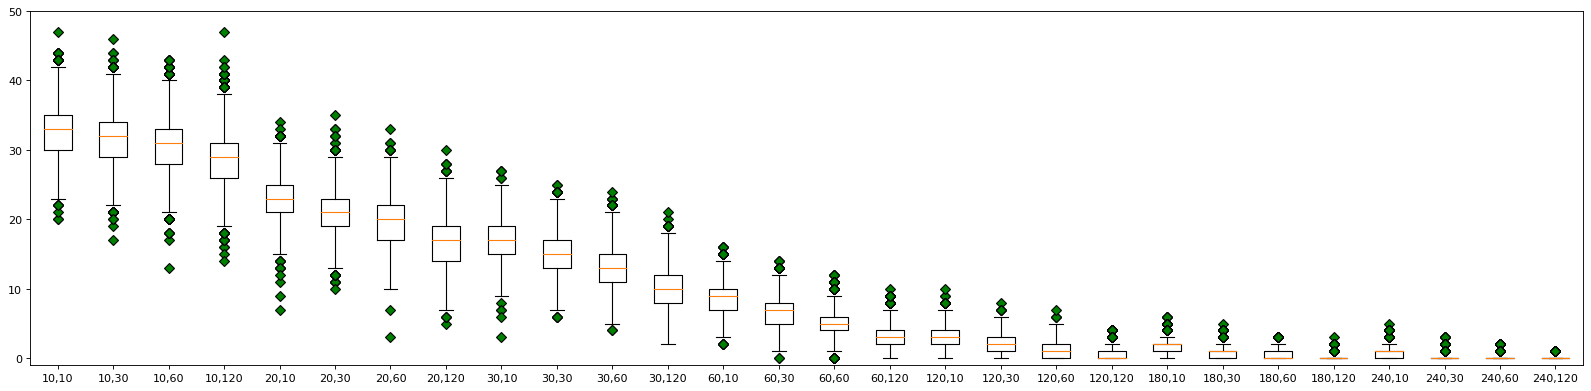

In [12]:
saveFigure = False
simple_boxplot(elapsed_timeout_dict, "elapsed_timeout_"+results_folder.split("/")[-1], saveFigure)

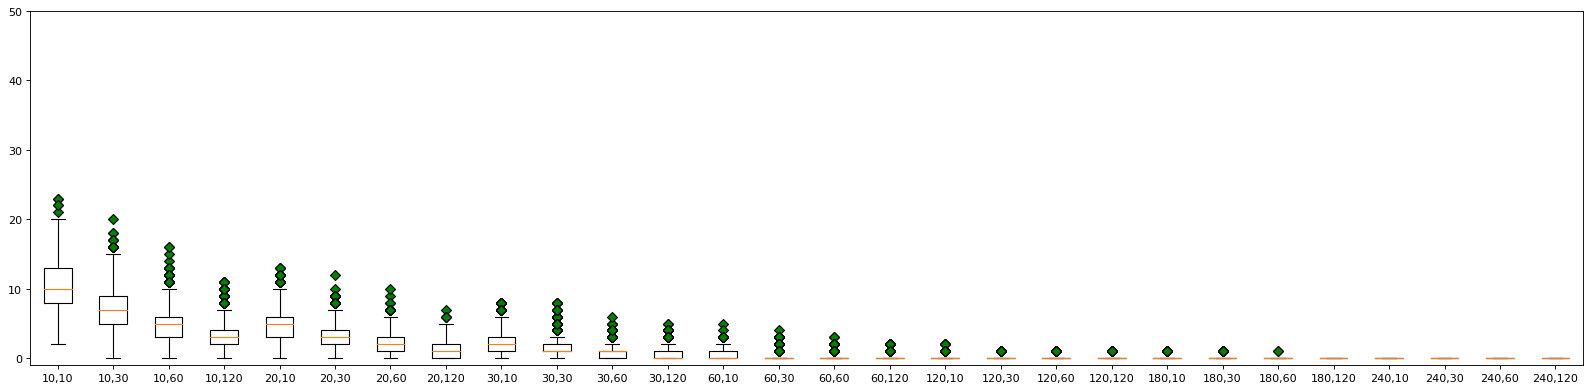

In [59]:
saveFigure = True
simple_boxplot(elapsed_timeout_dict, "elapsed_timeout_"+results_folder.split("/")[-1], saveFigure)